In [78]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn import metrics

from sklearn.svm import SVC

from sklearn.linear_model import LogisticRegression


df = pd.read_csv(r"C:\Users\pooji\Downloads\winequality.csv")
print(df)



       type  fixed acidity  volatile acidity  citric acid  residual sugar  \
0     white            7.0             0.270         0.36            20.7   
1     white            6.3             0.300         0.34             1.6   
2     white            8.1             0.280         0.40             6.9   
3     white            7.2             0.230         0.32             8.5   
4     white            7.2             0.230         0.32             8.5   
...     ...            ...               ...          ...             ...   
6492    red            6.2             0.600         0.08             2.0   
6493    red            5.9             0.550         0.10             2.2   
6494    red            6.3             0.510         0.13             2.3   
6495    red            5.9             0.645         0.12             2.0   
6496    red            6.0             0.310         0.47             3.6   

      chlorides  free sulfur dioxide  total sulfur dioxide  density    pH  

In [79]:
from sklearn.preprocessing import LabelEncoder
categ = ["type","fixed acidity","volatile acidity","citric acid","residual sugar","chlorides","free sulfur dioxide","total sulfur dioxide","density","pH","sulphates","alcohol","quality"]

# Encode Categorical Columns
le = LabelEncoder()
df[categ] = df[categ].apply(le.fit_transform)


In [80]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   type                  6497 non-null   int32
 1   fixed acidity         6497 non-null   int64
 2   volatile acidity      6497 non-null   int64
 3   citric acid           6497 non-null   int64
 4   residual sugar        6497 non-null   int64
 5   chlorides             6497 non-null   int64
 6   free sulfur dioxide   6497 non-null   int64
 7   total sulfur dioxide  6497 non-null   int64
 8   density               6497 non-null   int64
 9   pH                    6497 non-null   int64
 10  sulphates             6497 non-null   int64
 11  alcohol               6497 non-null   int64
 12  quality               6497 non-null   int64
dtypes: int32(1), int64(12)
memory usage: 634.6 KB


In [81]:
df.describe().T


,count,mean,std,min,25%,50%,75%,max
type,6497.0,0.753886,0.430779,0.0,1.0,1.0,1.0,1.0
fixed acidity,6497.0,33.269663,13.951212,0.0,24.0,31.0,39.0,106.0
volatile acidity,6497.0,49.398799,31.252108,0.0,28.0,40.0,64.0,187.0
citric acid,6497.0,31.860551,14.385117,0.0,25.0,31.0,39.0,89.0
residual sugar,6497.0,80.555641,75.357743,0.0,21.0,43.0,127.0,316.0
chlorides,6497.0,44.034016,27.563388,0.0,27.0,36.0,54.0,214.0
free sulfur dioxide,6497.0,37.527936,24.044791,0.0,19.0,34.0,52.0,134.0
total sulfur dioxide,6497.0,112.153917,58.629407,0.0,71.0,114.0,153.0,275.0
density,6497.0,537.162229,253.600334,0.0,329.0,555.0,754.0,997.0
pH,6497.0,44.919809,16.183652,0.0,34.0,44.0,55.0,108.0


In [82]:
df.isnull().sum()


type                    0
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [83]:
for col in df.columns:
  if df[col].isnull().sum()>0:
    df[col] = df[col].fillna(df[col].mean())

df.isnull().sum().sum()


0

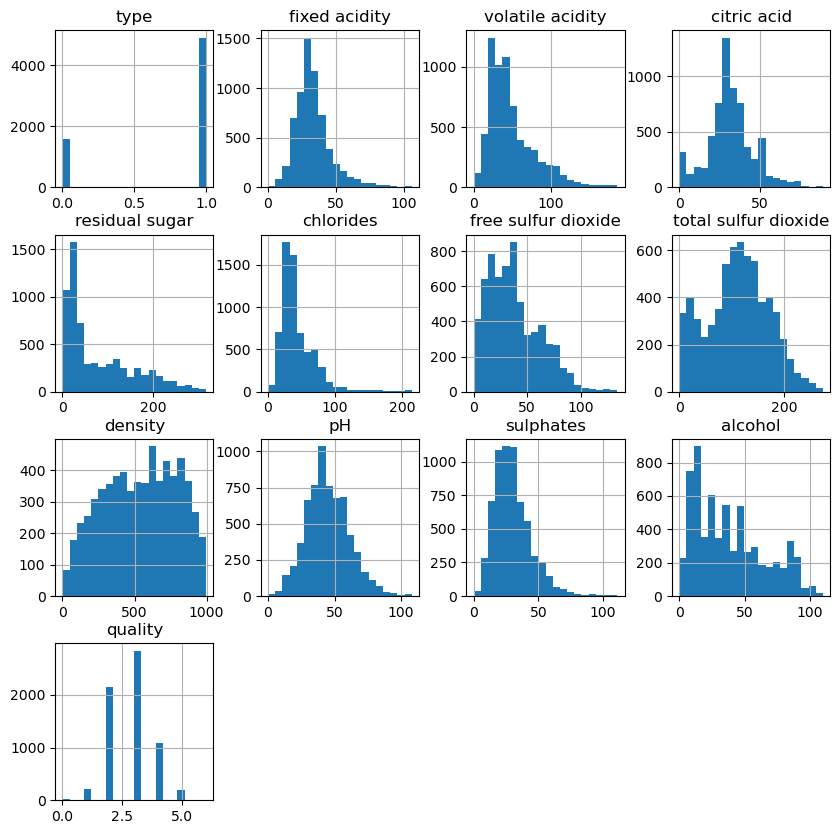

In [84]:
df.hist(bins=20, figsize=(10,10))
plt.show()

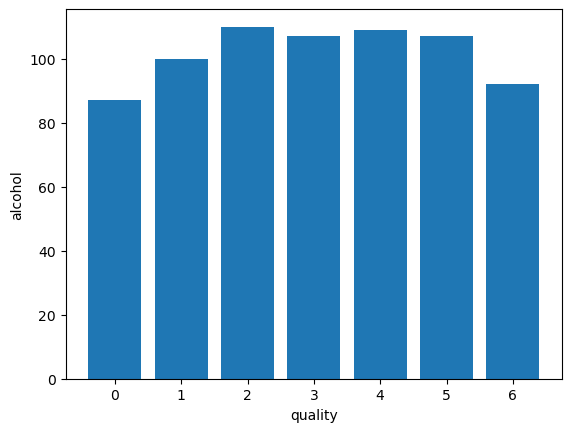

In [85]:
plt.bar(df["quality"],df["alcohol"])
plt.xlabel("quality")
plt.ylabel("alcohol")
plt.show()

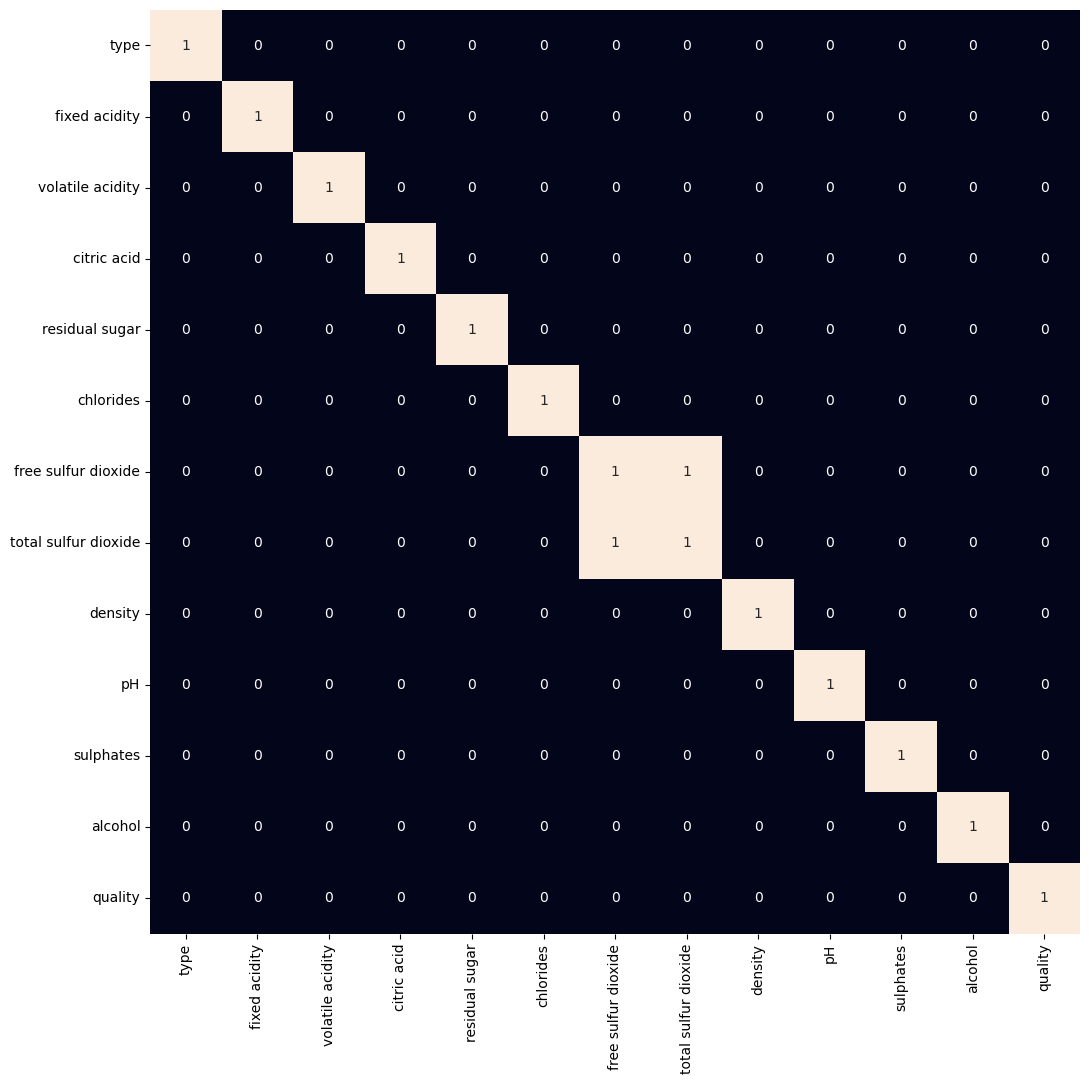

In [86]:
plt.figure(figsize=(12,12))
sb.heatmap(df.corr()>0.7, annot=True, cbar=False)
plt.show()

In [87]:
df=df.drop("total sulfur dioxide",axis=1)

In [88]:
df['best quality'] = [1 if x > 5 else 0 for x in df.quality]


In [89]:
df.replace({'white': 1, 'red': 0}, inplace=True)


In [90]:
features = df.drop(['quality', 'best quality'], axis=1)
target = df['best quality']
xtrain, xtest, ytrain, ytest = train_test_split(features, target, test_size=0.2, random_state=40)
xtrain.shape, xtest.shape

((5197, 11), (1300, 11))

In [91]:
norm = MinMaxScaler()
xtrain = norm.fit_transform(xtrain)
xtest = norm.transform(xtest)

In [92]:
models = [LogisticRegression(), SVC(kernel='rbf')]
for i in range(2):
    models[i].fit(xtrain, ytrain)
    print(f'{models[i]} : ')
    print('Training Accuracy : ', metrics.roc_auc_score(ytrain, models[i].predict(xtrain)))
    print('Validation Accuracy : ', metrics.roc_auc_score(ytest, models[i].predict(xtest)))
    print()

LogisticRegression() : 
Training Accuracy :  0.5
Validation Accuracy :  0.5

SVC() : 
Training Accuracy :  0.5
Validation Accuracy :  0.5



In [94]:
print(metrics.classification_report(ytest, models[1].predict(xtest)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1298
           1       0.00      0.00      0.00         2

    accuracy                           1.00      1300
   macro avg       0.50      0.50      0.50      1300
weighted avg       1.00      1.00      1.00      1300



C:\Users\pooji\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\pooji\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\pooji\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
